In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #plotting
import warnings
warnings.filterwarnings("ignore") #ignoring the seaborn warning
import matplotlib.pyplot as plt
#import matplotlib_inline 
from sklearn.model_selection import train_test_split
from sklearn import *
from sklearn.preprocessing import RobustScaler

In [128]:

#from google.colab import drive
#drive.mount('/content/gdrive')
df = pd.read_csv("/Users/juhil/Desktop/heart dataset.csv") #loading the datasets

In [129]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,70.0,0,3,139,239,0,1,151,0,1.8,2,2,2,1
1506,60.0,1,0,136,234,0,1,161,0,0.5,1,0,3,1
1507,45.0,1,2,131,233,0,1,179,1,0.4,2,0,2,1
1508,43.0,1,0,141,226,0,1,178,0,0.0,2,0,2,1


In [130]:
df.head(10) #loading the first 10 rows to analyse the datasets

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57.0,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56.0,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44.0,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52.0,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57.0,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Changing the name of columns and giving them a meaningful name so anyone can understand better

In [131]:
new_cols = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [132]:
df.columns = new_cols

In [133]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
df.shape #303 rows and 14 cols

(1510, 14)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1494 non-null   float64
 1   sex       1510 non-null   int64  
 2   cp        1510 non-null   int64  
 3   trtbps    1510 non-null   int64  
 4   chol      1510 non-null   int64  
 5   fbs       1510 non-null   int64  
 6   rest_ecg  1510 non-null   int64  
 7   thalach   1510 non-null   int64  
 8   exang     1510 non-null   int64  
 9   oldpeak   1510 non-null   float64
 10  slope     1510 non-null   int64  
 11  ca        1510 non-null   int64  
 12  thal      1510 non-null   int64  
 13  target    1510 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 165.3 KB


In [136]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1506,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1507,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1508,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
df.isnull().sum() #We have 16 missing values in age column


age         16
sex          0
cp           0
trtbps       0
chol         0
fbs          0
rest_ecg     0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [138]:
#filling the missing value with tha age average value
df['age'].mean()
df['age'].fillna(int(df['age'].mean()), inplace= True)

Now we know that😁
Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”

#####
Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

In [139]:
num_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
cat_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]


In [140]:
df[num_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,52.780132,131.165563,236.632450,154.197351,1.423046
std,12.809224,17.644239,60.044456,66.481880,1.158155
min,24.000000,94.000000,29.000000,1.000000,0.000000
25%,43.250000,120.000000,192.000000,129.000000,0.700000
50%,53.000000,130.000000,233.000000,155.000000,1.300000
75%,63.000000,140.000000,273.000000,178.000000,2.000000
max,87.000000,200.000000,564.000000,2367.000000,23.000000


Let's plot some graph for better visuals and understanding

<AxesSubplot:xlabel='age', ylabel='Density'>

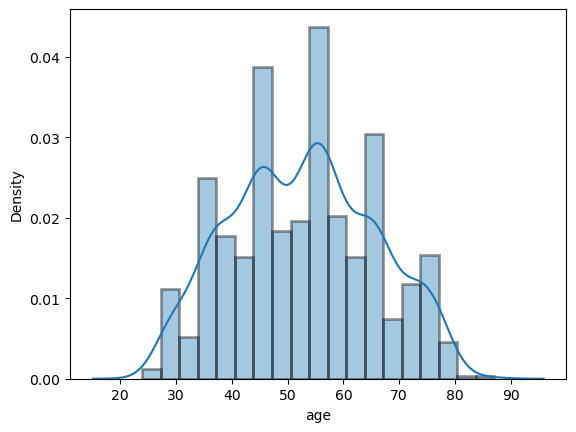

In [141]:
sns.distplot(df["age"], hist_kws = dict(linewidth = 2, edgecolor = "k"))

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

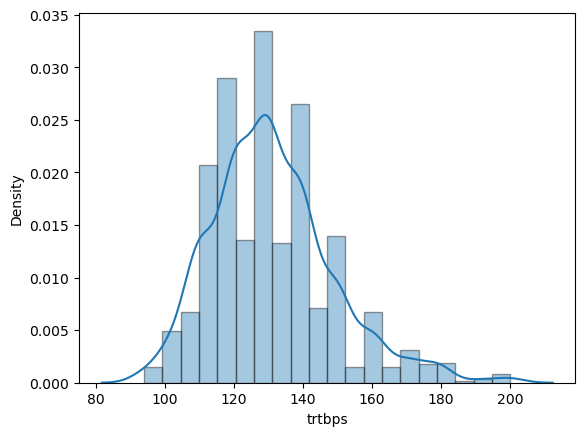

In [142]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

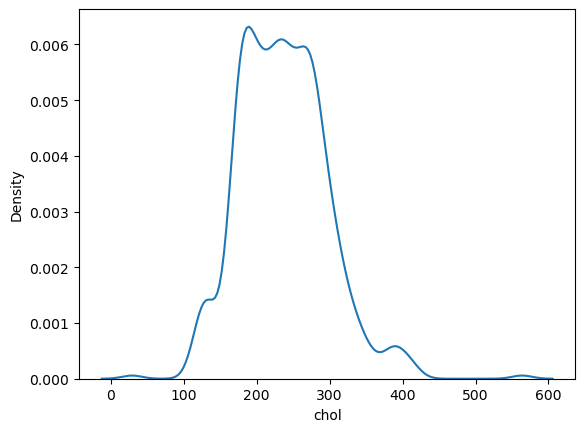

In [143]:
sns.distplot(df["chol"], hist = False);

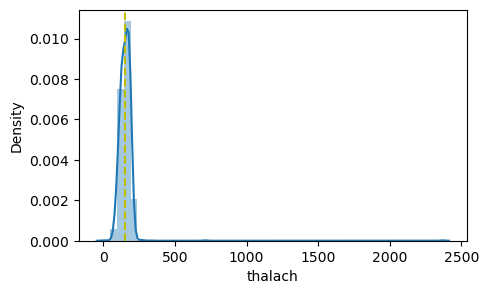

In [144]:
x, y = plt.subplots(figsize = (5, 3))
sns.distplot(df["thalach"], hist = True, ax = y)
y.axvline(df["thalach"].mean(), color = "y", ls = "--")

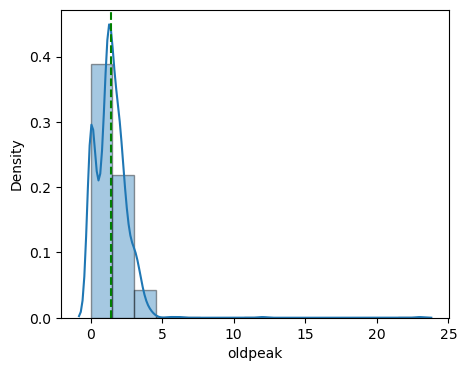

In [145]:
x, y = plt.subplots(figsize = (5, 4))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 15, ax = y)
y.axvline(df["oldpeak"].mean(), color = "g", ls = "--")

### Result from above graph
- The minimum value of the "oldpeak" variable is 0, the maximum value is 6.20, so the middle point according to these two values is 3.10
- When we look at the mean, we see that it is 1.03
- When we examine the quartiles, 75% of the data consists of values up to 1.60
- This shows that; There is an incredible right skew in the data.

In [146]:
!pip install pandas-profiling

In [147]:
#Commenting out because it will not run everytime
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

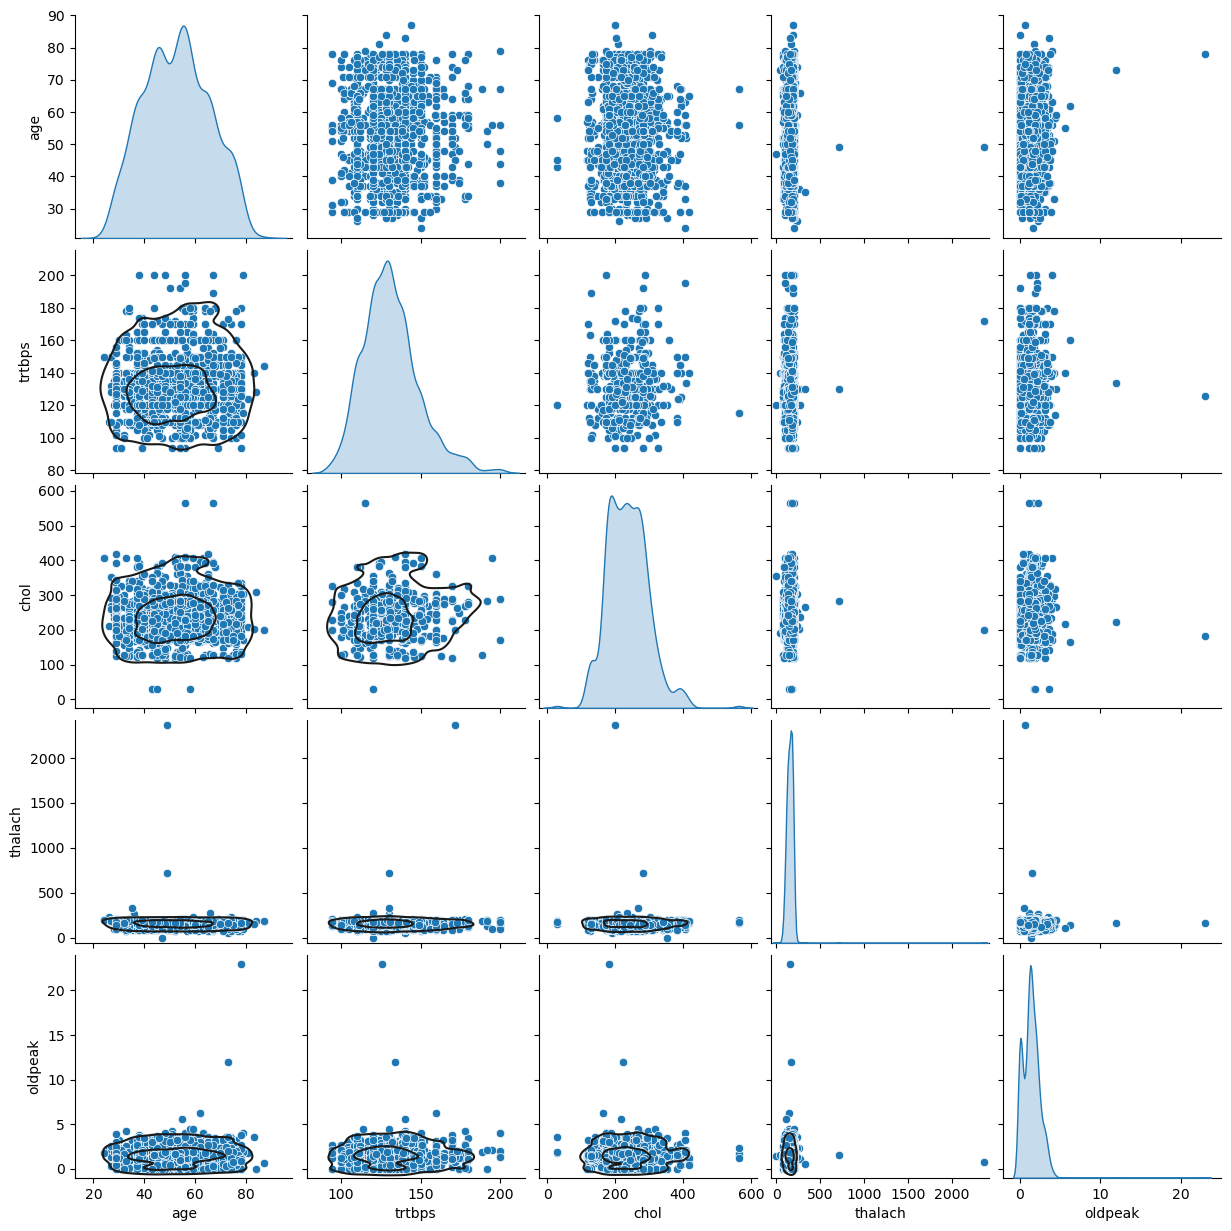

In [148]:
graph = sns.pairplot(df[num_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot, levels = 3, color = ".1")
plt.show()

## Removing the cols which has low corelation

In [149]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [150]:
df.drop(["chol", "fbs", "rest_ecg"], axis = 1, inplace = True)

### Checking the outliers using box plot

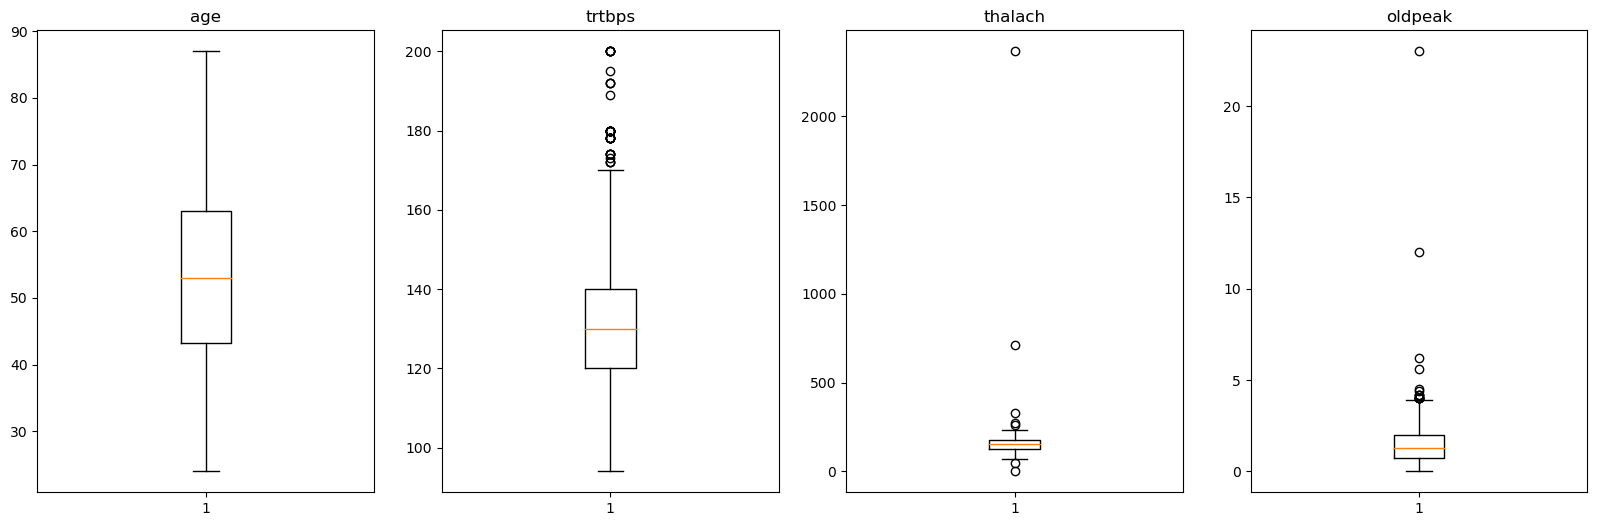

In [151]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")
 
ax3.boxplot(df["thalach"])
ax3.set_title("thalach")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

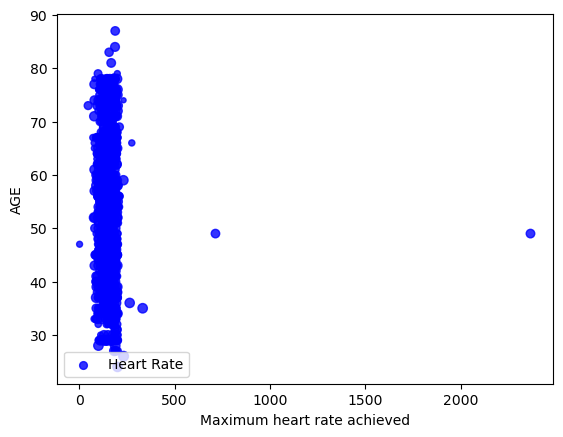

In [152]:
x = df['thalach']
y = df['age']
s = np.random.rand(*x.shape) * 150 + 50

plt.scatter(x, y, s, c="b", alpha=0.8, marker=r'.',
            label="Heart Rate")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("AGE")
plt.legend(loc='lower left')
plt.show()

### Applying One Hot Encoding Method to Categorical Variables

In [153]:
df_copy = df.copy()

In [154]:
df_copy.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,150,0,2.3,0,0,1,1
1,37.0,1,2,130,187,0,3.5,0,0,2,1
2,41.0,0,1,130,172,0,1.4,2,0,2,1
3,56.0,1,1,120,178,0,0.8,2,0,2,1
4,57.0,0,0,120,163,1,0.6,2,0,2,1


In [155]:
cat_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [156]:
cat_var.remove("fbs")
cat_var.remove("rest_ecg")

In [157]:
cat_var

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [158]:
df_copy = pd.get_dummies(df_copy, columns = cat_var[:-1], drop_first = True)

In [159]:
df_copy.head()

,age,trtbps,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63.0,145,150,2.3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,37.0,130,187,3.5,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41.0,130,172,1.4,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,56.0,120,178,0.8,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,57.0,120,163,0.6,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0


## Applying feature scaling 

In [160]:
rbs = RobustScaler()
new_num_var = ["age", "thalach", "trtbps", "oldpeak"]
df_copy[new_num_var] = rbs.fit_transform(df_copy[new_num_var])
df_copy.head()

,age,trtbps,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.506329,0.75,-0.102041,0.769231,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,-0.810127,0.00,0.653061,1.692308,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,-0.607595,0.00,0.346939,0.076923,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,0.151899,-0.50,0.469388,-0.384615,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0
4,0.202532,-0.50,0.163265,-0.538462,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0


## Separating Data into Test and Training Set

In [161]:
X = df_copy.drop(["target"], axis = 1)
y = df_copy[["target"]]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [163]:
X_train.head()

,age,trtbps,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
904,-0.253165,-0.90,-0.326531,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,1,0
792,-0.354430,-0.50,0.551020,-0.153846,1,0,0,0,1,0,0,0,0,0,0,1,0,0
426,0.151899,-1.00,-0.367347,-0.230769,0,1,0,0,0,0,0,0,0,0,0,0,0,1
473,-0.708861,0.25,-0.551020,1.153846,1,0,0,0,0,1,0,1,0,0,0,0,0,1
1144,-0.810127,-0.60,-0.204082,-0.153846,1,0,1,0,0,1,0,1,0,0,0,0,1,0


In [164]:
y_train.head()

,target
904,1
792,0
426,0
473,0
1144,1


## ML Algorithms 

In [165]:
#Linear Regression 

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr

LogisticRegression()

In [167]:
lr.fit(X_train, y_train)

LogisticRegression()

In [168]:
y_pred = lr.predict(X_test)

In [169]:
y_pred


array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [170]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8874172185430463


In [171]:
from sklearn.model_selection import cross_val_score

In [172]:
scores = cross_val_score(lr, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8841935483870967


In [173]:
from sklearn.metrics import confusion_matrix
conf= confusion_matrix (y_test, y_pred)
print("Confusion Matrix:", conf)
print("The Accuracy of LR is: ", accuracy_score(y_test, y_pred)*1)

Confusion Matrix: [[108  11]
 [ 23 160]]
The Accuracy of LR is:  0.8874172185430463


In [174]:
from sklearn.metrics import plot_roc_curve

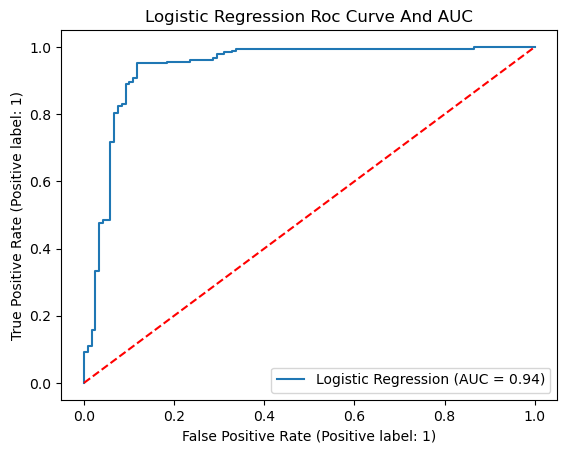

In [175]:
plot_roc_curve(lr, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [176]:
#Decision tree algorithm

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
dt = DecisionTreeClassifier()

In [179]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [180]:
y_pred = dt.predict(X_test)

In [181]:
print("The test accuracy score of Decision Tree is:", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is: 0.9337748344370861


In [182]:
scores = cross_val_score(dt, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8178494623655913


### With hyperparameter tuning using GridSearchCV 

In [183]:
td = {
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14, None]
}

In [184]:
from sklearn.model_selection import GridSearchCV

gsc = GridSearchCV(dt, param_grid = td, cv = 10, n_jobs= -1)
gsc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, None]})

In [185]:
gsc.best_score_

0.9121763085399449

In [186]:
gsc.best_params_

{'criterion': 'entropy', 'max_depth': 13}

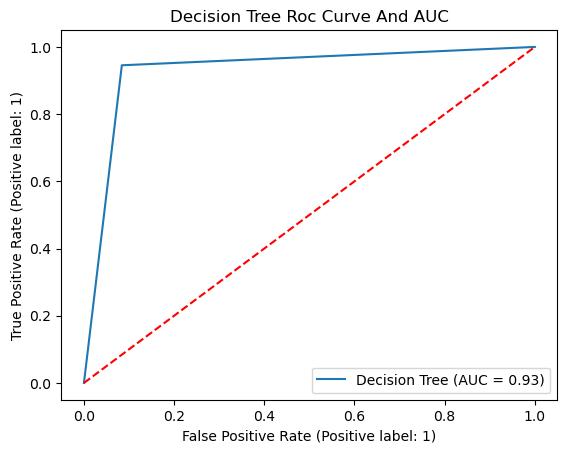

In [187]:
plot_roc_curve(dt, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()